<a href="https://colab.research.google.com/github/rahuladhikari20/pocket_book/blob/main/final_project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import time

In [3]:
data=pd.read_csv("/content/drive/MyDrive/creditcardfraud.csv")

#dataset description

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,111096.0,2.095273,0.005363,-1.448645,0.320803,0.366733,-0.647091,-0.007670,-0.280977,2.187868,...,0.090701,0.622382,0.006800,0.352553,0.323243,-0.466764,-0.026065,-0.058691,1.00,0
1,79272.0,1.158282,-0.180178,0.967549,0.888652,-0.957101,-0.412826,-0.436789,-0.008261,0.808686,...,0.074346,0.398780,-0.123952,0.457047,0.485607,0.507722,0.001095,0.022840,29.90,0
2,132593.0,1.953608,-0.626281,-0.273542,0.523814,-1.008114,-0.605656,-0.737915,0.030429,1.513787,...,0.150353,0.537825,0.159876,-0.009313,-0.335374,0.573685,-0.033367,-0.047451,28.75,0
3,152511.0,0.191138,0.975684,-0.306871,-0.184487,0.998363,-1.317371,1.216015,-0.518100,0.015540,...,0.236043,1.134086,-0.216546,-0.053337,-0.329110,-0.167737,0.229836,-0.028356,8.61,0
4,140096.0,-3.539055,-4.193024,-3.026249,2.160445,3.760330,-2.281773,0.117071,0.305625,-1.052794,...,1.172759,1.406402,0.650456,0.282794,-0.968230,-0.437851,0.445302,-0.347395,329.96,0


In [5]:
data.shape

(10492, 31)

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,...,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000
mean,93684.105700,-0.249338,0.147207,-0.319251,0.206661,-0.149669,-0.090609,-0.265507,0.037047,-0.111551,...,0.034627,0.005107,-0.002149,-0.010896,0.005093,0.002206,0.006591,0.000322,90.296560,0.046893
std,47295.911703,2.679344,2.184289,2.587227,1.782261,1.835993,1.337261,2.245286,1.881642,1.314826,...,1.123525,0.782964,0.823281,0.604424,0.545179,0.476910,0.477662,0.356696,308.696285,0.211419
min,10.000000,-46.855047,-60.464618,-31.103685,-4.826127,-22.105532,-10.580776,-43.557242,-41.484823,-13.434066,...,-22.797604,-9.499423,-27.533643,-2.640481,-7.081325,-2.604551,-7.263482,-8.310167,0.000000,0.000000
25%,53381.000000,-1.009196,-0.570226,-1.035594,-0.813001,-0.747317,-0.824962,-0.613812,-0.205168,-0.711025,...,-0.224789,-0.530924,-0.169049,-0.367533,-0.314707,-0.322022,-0.069999,-0.053289,4.990000,0.000000
50%,83632.500000,-0.051853,0.115159,0.119919,0.054051,-0.086420,-0.306040,0.013436,0.034596,-0.087433,...,-0.021082,0.013939,-0.012274,0.037858,0.024195,-0.049701,0.004842,0.011881,21.245000,0.000000
75%,138225.250000,1.282531,0.877200,0.982344,0.905784,0.586931,0.363821,0.546518,0.355402,0.566684,...,0.210143,0.534811,0.155904,0.426898,0.358226,0.243442,0.101319,0.081666,77.142500,0.000000
max,172787.000000,2.408046,22.057729,3.802986,16.875344,13.028001,8.060516,24.422716,20.007208,8.075460,...,27.202839,8.361985,22.528412,4.022866,4.301757,3.004455,4.985140,13.999688,18910.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10492 entries, 0 to 10491
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10492 non-null  float64
 1   V1      10492 non-null  float64
 2   V2      10492 non-null  float64
 3   V3      10492 non-null  float64
 4   V4      10492 non-null  float64
 5   V5      10492 non-null  float64
 6   V6      10492 non-null  float64
 7   V7      10492 non-null  float64
 8   V8      10492 non-null  float64
 9   V9      10492 non-null  float64
 10  V10     10492 non-null  float64
 11  V11     10492 non-null  float64
 12  V12     10492 non-null  float64
 13  V13     10492 non-null  float64
 14  V14     10492 non-null  float64
 15  V15     10492 non-null  float64
 16  V16     10492 non-null  float64
 17  V17     10492 non-null  float64
 18  V18     10492 non-null  float64
 19  V19     10492 non-null  float64
 20  V20     10492 non-null  float64
 21  V21     10492 non-null  float64
 22

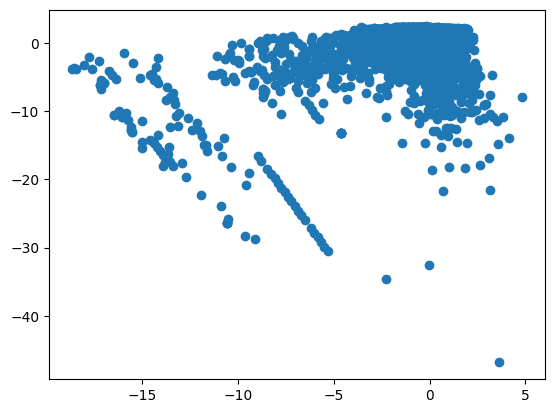

In [8]:
plt.scatter(data.iloc[:,12],data.iloc[:,1])


In [9]:
data['Class'].value_counts()

,count
Class,
0,10000
1,492


#Data Preparation

In [10]:
df_unscaled=data.drop(['Class'],axis=1)

In [11]:
df=StandardScaler().fit_transform(df_unscaled)

In [12]:
y=data['Class']

In [13]:
X=df

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_train_reduced = tsne.fit_transform(X_train)
X_test_reduced = tsne.fit_transform(X_test)

#Isolation Forest

In [16]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(contamination=0.08,n_estimators=100, random_state=42)
s_time_if=time.time()
clf.fit(X_train)
e_time_if=time.time()
pred=clf.predict(X_train)

In [17]:
y_pred_if_test=clf.predict(X_test)
y_pred_if_test

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
outlier_if_test=np.where(y_pred_if_test==-1)
outlier_if_test

(array([  15,   27,   31,   44,   47,   56,   62,   67,   69,   77,   96,
          97,  116,  121,  136,  137,  142,  148,  155,  159,  191,  192,
         197,  200,  203,  204,  217,  230,  236,  237,  254,  255,  256,
         273,  277,  278,  300,  313,  314,  317,  321,  332,  334,  369,
         384,  408,  409,  429,  436,  466,  477,  492,  500,  507,  522,
         523,  525,  533,  564,  566,  568,  578,  600,  622,  624,  632,
         671,  673,  677,  683,  686,  738,  751,  797,  804,  805,  824,
         838,  841,  843,  874,  898,  914,  928,  932,  945,  947,  951,
        1000, 1028, 1072, 1082, 1086, 1105, 1115, 1133, 1146, 1166, 1201,
        1204, 1208, 1226, 1234, 1254, 1258, 1260, 1265, 1267, 1268, 1270,
        1292, 1294, 1299, 1339, 1342, 1362, 1371, 1377, 1384, 1386, 1392,
        1399, 1414, 1428, 1431, 1441, 1461, 1467, 1491, 1507, 1510, 1525,
        1544, 1564, 1568, 1591, 1595, 1603, 1624, 1638, 1664, 1672, 1695,
        1704, 1747, 1754, 1768, 1771, 

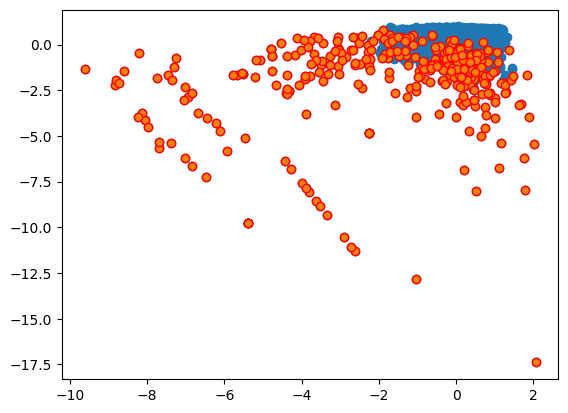

In [19]:
plt.scatter(X_test[:,12],X_test[:,1])
plt.scatter(X_test[outlier_if_test,12],X_test[outlier_if_test,1], edgecolors='r')

In [20]:
y_pred_if_test[y_pred_if_test ==1]=0
y_pred_if_test[y_pred_if_test==-1]=1

#LocalOutlierFactor

In [21]:
import sklearn.neighbors as lof
lof=lof.LocalOutlierFactor(n_neighbors=5)
s_time_lof=time.time()
lof.fit(X_train)
e_time_lof=time.time()

In [22]:
lof.fit(X_train)

LocalOutlierFactor(n_neighbors=5)

In [23]:
y_pred_lof = lof.fit_predict(X_test)
y_pred_lof

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
outlier_lof = np.where(y_pred_lof == -1)
outlier_lof

(array([   5,    7,   16,   31,   46,   71,   86,   94,   96,  102,  105,
         109,  110,  111,  112,  120,  135,  142,  159,  161,  162,  177,
         185,  192,  204,  217,  223,  228,  244,  246,  259,  273,  289,
         298,  313,  332,  333,  336,  340,  376,  395,  406,  440,  450,
         459,  465,  477,  492,  509,  510,  522,  524,  533,  542,  546,
         547,  552,  582,  601,  665,  684,  700,  709,  714,  718,  726,
         734,  738,  775,  797,  804,  818,  834,  859,  862,  880,  886,
         891,  903,  905,  908,  920,  945,  961,  981,  990, 1008, 1014,
        1026, 1028, 1031, 1046, 1047, 1054, 1068, 1072, 1082, 1086, 1131,
        1146, 1150, 1154, 1161, 1166, 1169, 1179, 1194, 1199, 1226, 1234,
        1249, 1258, 1280, 1281, 1288, 1291, 1299, 1317, 1326, 1330, 1348,
        1367, 1386, 1387, 1392, 1396, 1414, 1424, 1430, 1431, 1448, 1487,
        1490, 1495, 1507, 1512, 1559, 1564, 1568, 1582, 1592, 1595, 1599,
        1603, 1614, 1648, 1652, 1668, 

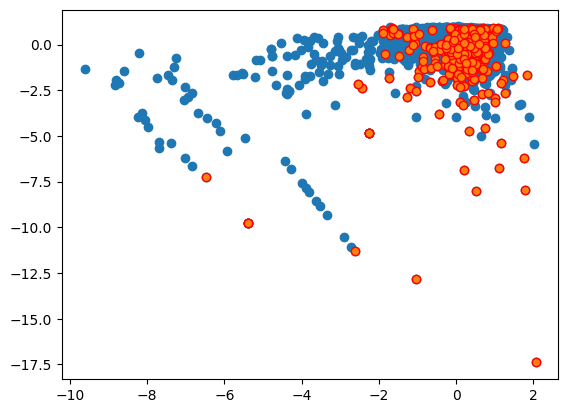

In [25]:
plt.scatter(X_test[:,12],X_test[:,1])
plt.scatter(X_test[outlier_lof,12],X_test[outlier_lof,1], edgecolors='r')

In [26]:
y_pred_lof[y_pred_lof ==1]=0
y_pred_lof[y_pred_lof==-1]=1

#DBSCAN

In [27]:
import sklearn.cluster as dbscan
dbscan=dbscan.DBSCAN(eps=5)
s_time_db=time.time()
dbscan.fit(X_train)
e_time_db=time.time()

In [28]:
dbscan.fit_predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y_pred_db=dbscan.fit_predict(X_test)

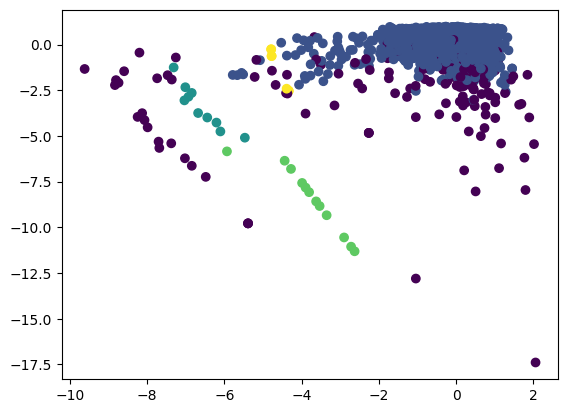

In [30]:
plt.scatter(X_test[:,12],X_test[:,1], c=dbscan.labels_)

#Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=10)
s_time_rfc=time.time()
rfc.fit(X_train,y_train)
e_time_rfc=time.time()

In [32]:
y_pred_rfc=rfc.predict(df)
y_pred_rfc

array([0, 0, 0, ..., 1, 1, 0])

In [33]:
y_pred_rfc_test=rfc.predict(X_test)
y_pred_rfc_test

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
outlier_rfc_test = np.where(y_pred_rfc_test == 1)
outlier_rfc_test

(array([  27,   31,   44,   56,   62,   67,   77,   97,  116,  119,  121,
         136,  191,  197,  200,  203,  230,  237,  254,  277,  278,  291,
         314,  321,  369,  392,  408,  500,  523,  525,  564,  566,  568,
         578,  600,  622,  673,  677,  683,  805,  824,  843,  928,  939,
         947,  951, 1115, 1146, 1187, 1234, 1258, 1267, 1294, 1384, 1386,
        1399, 1414, 1441, 1461, 1467, 1499, 1525, 1591, 1638, 1695, 1704,
        1712, 1754, 1768, 1771, 1803, 1824, 1872, 1915, 1951, 1983, 2050,
        2053, 2065, 2108, 2139, 2156, 2175, 2177, 2241, 2270, 2279, 2321,
        2355, 2384, 2396, 2427, 2432, 2461, 2493, 2587, 2639, 2673, 2677,
        2688, 2765, 2772, 2841, 2919, 2952, 2973, 3004, 3014, 3021, 3023,
        3024, 3041, 3069, 3072, 3081, 3122, 3137, 3182, 3200, 3230, 3252,
        3277, 3289, 3306, 3322, 3347, 3365, 3369, 3370, 3373, 3382, 3404,
        3412, 3425, 3438, 3443, 3473, 3486, 3576, 3601, 3699, 3779, 3794,
        3801, 3810, 3851, 3858, 3880, 

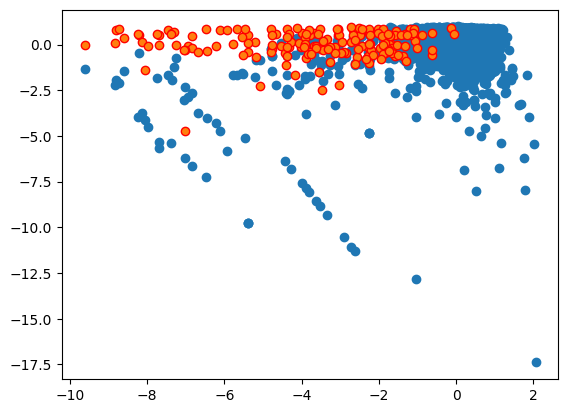

In [35]:
plt.scatter(X_test[:,12],X_test[:,1])
plt.scatter(X_test[outlier_rfc_test,12], df[outlier_rfc_test,1], edgecolors='r')

#Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
s_time_lr=time.time()
lr.fit(X_train, y_train)
e_time_lr=time.time()

y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3997
           1       0.98      0.83      0.90       200

    accuracy                           0.99      4197
   macro avg       0.99      0.91      0.95      4197
weighted avg       0.99      0.99      0.99      4197



In [37]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
outlier_lr = np.where(y_pred == 1)
outlier_lr

(array([  27,   31,   44,   56,   62,   67,   77,   97,  116,  119,  121,
         136,  191,  197,  200,  203,  230,  237,  254,  277,  278,  291,
         314,  321,  369,  392,  408,  492,  500,  523,  525,  564,  566,
         568,  578,  600,  622,  673,  677,  683,  805,  824,  843,  928,
         939,  947,  951, 1115, 1146, 1187, 1234, 1258, 1267, 1294, 1384,
        1386, 1399, 1441, 1461, 1467, 1499, 1525, 1591, 1638, 1695, 1704,
        1712, 1754, 1768, 1771, 1803, 1824, 1872, 1915, 1951, 1983, 2050,
        2053, 2065, 2108, 2139, 2156, 2175, 2177, 2241, 2270, 2279, 2321,
        2355, 2384, 2396, 2427, 2432, 2461, 2493, 2587, 2639, 2673, 2677,
        2688, 2765, 2772, 2841, 2919, 2952, 2973, 3004, 3014, 3023, 3024,
        3041, 3069, 3072, 3081, 3122, 3137, 3182, 3200, 3230, 3252, 3277,
        3289, 3306, 3322, 3347, 3365, 3369, 3370, 3373, 3382, 3404, 3412,
        3425, 3438, 3443, 3473, 3486, 3576, 3601, 3699, 3779, 3794, 3801,
        3810, 3851, 3852, 3858, 3880, 

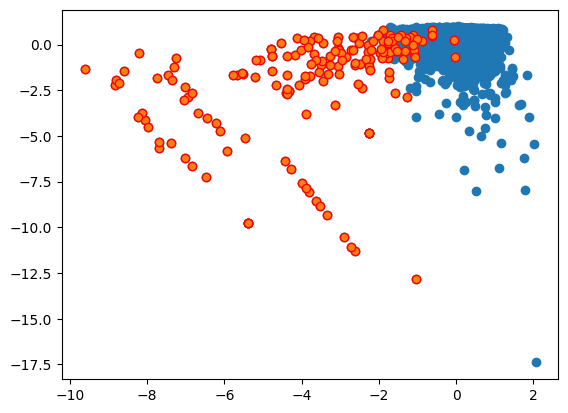

In [39]:
plt.scatter(X_test[:,12],X_test[:,1])
plt.scatter(X_test[outlier_lr,12],X_test[outlier_lr,1], edgecolors='r')

#Decision trees

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
s_time_dt=time.time()
dt_model.fit(X_train, y_train)
e_time_dt=time.time()

y_pred_dt = dt_model.predict(X_test)

In [41]:
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
outlier_dt = np.where(y_pred_dt == 1)
outlier_dt

(array([  27,   31,   44,   56,   62,   67,   77,   97,  116,  119,  121,
         136,  191,  197,  200,  203,  230,  237,  254,  277,  278,  314,
         321,  369,  374,  392,  408,  433,  470,  492,  500,  523,  525,
         546,  564,  566,  568,  578,  600,  606,  621,  622,  673,  677,
         683,  738,  751,  805,  824,  838,  843,  857,  928,  939,  947,
         951, 1028, 1038, 1115, 1146, 1187, 1234, 1258, 1267, 1268, 1294,
        1384, 1386, 1399, 1414, 1441, 1461, 1467, 1499, 1525, 1542, 1591,
        1600, 1638, 1693, 1695, 1704, 1754, 1768, 1771, 1803, 1824, 1872,
        1915, 1930, 1951, 1952, 1983, 2050, 2053, 2063, 2065, 2108, 2138,
        2139, 2156, 2175, 2177, 2270, 2279, 2321, 2350, 2355, 2384, 2396,
        2427, 2432, 2461, 2474, 2493, 2547, 2585, 2587, 2639, 2673, 2677,
        2688, 2765, 2772, 2841, 2952, 2973, 3004, 3014, 3021, 3023, 3024,
        3041, 3069, 3072, 3081, 3122, 3137, 3182, 3200, 3230, 3252, 3277,
        3289, 3306, 3322, 3347, 3365, 

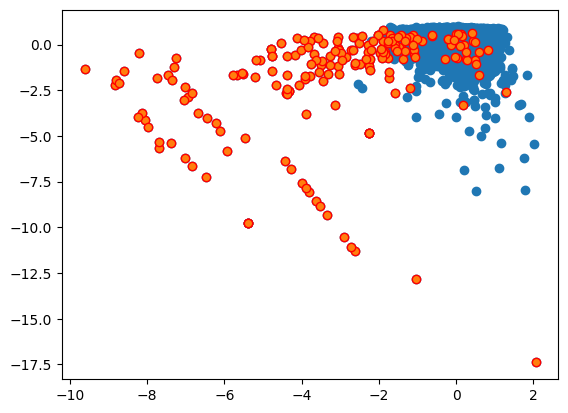

In [43]:
plt.scatter(X_test[:,12],X_test[:,1])
plt.scatter(X_test[outlier_dt,12],X_test[outlier_dt,1], edgecolors='r')

[Text(0.5375, 0.9, 'x[14] <= -1.62\ngini = 0.088\nsamples = 6295\nvalue = [6003, 292]'),
 Text(0.325, 0.7, 'x[10] <= -0.287\ngini = 0.126\nsamples = 252\nvalue = [17, 235]'),
 Text(0.43125, 0.8, 'True  '),
 Text(0.2, 0.5, 'x[10] <= -0.577\ngini = 0.017\nsamples = 233\nvalue = [2, 231]'),
 Text(0.1, 0.3, 'x[15] <= 1.076\ngini = 0.009\nsamples = 230\nvalue = [1, 229]'),
 Text(0.05, 0.1, '\n  (...)  \n'),
 Text(0.15, 0.1, '\n  (...)  \n'),
 Text(0.3, 0.3, 'x[26] <= -0.798\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.35, 0.1, '\n  (...)  \n'),
 Text(0.45, 0.5, 'x[21] <= -0.207\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.5, 0.3, 'x[13] <= -0.829\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.45, 0.1, '\n  (...)  \n'),
 Text(0.55, 0.1, '\n  (...)  \n'),
 Text(0.75, 0.7, 'x[17] <= -1.253\ngini = 0.019\nsamples = 6043\nvalue = [5986, 57]'),
 Text(0.64375, 0.8, '  False'),

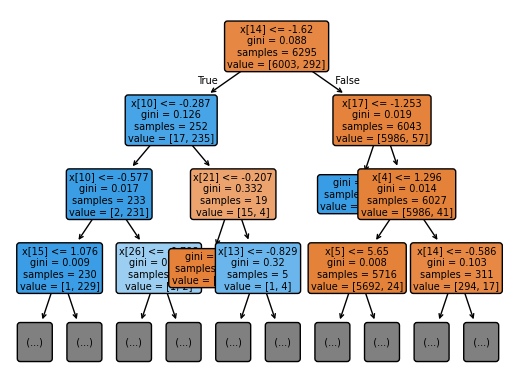

In [44]:
from sklearn import tree
from sklearn.tree import plot_tree
tree.plot_tree(dt_model, max_depth=3, filled=True, fontsize=7, rounded=True)

#One-Class SVM

In [45]:
from sklearn.svm import OneClassSVM
x_train_svm = X_train[y_train == 0]
oc_svm = OneClassSVM(kernel='rbf', nu=0.001)
s_time_oc_svm=time.time()
oc_svm.fit(x_train_svm)
e_time_oc_svm=time.time()

y_pred_oc_svm = oc_svm.predict(X_test)

outlier_oc_svm = np.where(y_pred_oc_svm == -1)

In [46]:
outlier_oc_svm

(array([  15,   27,   31,   44,   47,   49,   56,   62,   67,   69,   76,
          77,   96,   97,  116,  119,  121,  136,  137,  148,  155,  159,
         191,  197,  200,  203,  204,  217,  230,  236,  237,  254,  255,
         273,  277,  278,  280,  291,  300,  306,  313,  314,  317,  321,
         330,  332,  334,  369,  384,  392,  408,  409,  436,  442,  466,
         477,  492,  500,  507,  522,  523,  525,  533,  564,  566,  568,
         578,  600,  622,  624,  632,  665,  673,  677,  683,  738,  751,
         797,  804,  805,  824,  838,  841,  843,  874,  880,  898,  914,
         928,  934,  939,  945,  947,  951,  963,  986, 1014, 1032, 1036,
        1068, 1072, 1082, 1115, 1146, 1154, 1166, 1187, 1199, 1201, 1204,
        1205, 1208, 1226, 1234, 1254, 1258, 1260, 1265, 1267, 1268, 1270,
        1292, 1294, 1299, 1339, 1348, 1361, 1362, 1371, 1377, 1384, 1386,
        1392, 1399, 1414, 1428, 1431, 1441, 1461, 1467, 1491, 1499, 1507,
        1525, 1544, 1564, 1568, 1581, 

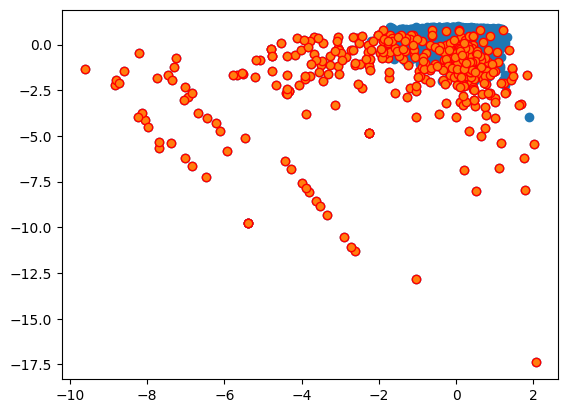

In [47]:
plt.scatter(X_test[:,12],X_test[:,1])
plt.scatter(X_test[outlier_oc_svm,12],X_test[outlier_oc_svm,1], edgecolors='r')

In [48]:
y_pred_oc_svm[y_pred_oc_svm ==1]=0
y_pred_oc_svm[y_pred_oc_svm==-1]=1

#Using Bagging

In [49]:
from sklearn.ensemble import BaggingClassifier
bgc=BaggingClassifier(n_estimators=100)
s_time_bgc=time.time()
bgc.fit(X_train,y_train)
e_time_bgc=time.time()

In [50]:
y_pred_bgc_test=bgc.predict(X_test)
y_pred_bgc_test

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
outlier_bagging =np.where(bgc.predict(X_test)==1)
outlier_bagging

(array([  27,   31,   44,   56,   62,   67,   77,   97,  116,  119,  121,
         136,  191,  197,  200,  203,  230,  237,  254,  277,  278,  291,
         314,  321,  369,  392,  408,  500,  523,  525,  564,  566,  568,
         578,  600,  622,  673,  677,  683,  805,  824,  843,  928,  939,
         947,  951, 1115, 1146, 1187, 1234, 1258, 1267, 1294, 1384, 1386,
        1399, 1414, 1441, 1461, 1467, 1499, 1525, 1591, 1638, 1695, 1704,
        1754, 1768, 1771, 1803, 1824, 1872, 1915, 1951, 1983, 2050, 2053,
        2065, 2108, 2139, 2156, 2175, 2177, 2241, 2270, 2279, 2321, 2355,
        2384, 2396, 2427, 2432, 2461, 2493, 2587, 2639, 2673, 2677, 2688,
        2765, 2772, 2841, 2919, 2952, 2973, 3004, 3014, 3021, 3023, 3024,
        3041, 3069, 3072, 3081, 3122, 3137, 3182, 3200, 3230, 3252, 3277,
        3289, 3306, 3322, 3347, 3365, 3369, 3370, 3373, 3382, 3404, 3412,
        3425, 3438, 3443, 3473, 3486, 3576, 3601, 3699, 3779, 3794, 3801,
        3810, 3851, 3852, 3858, 3880, 

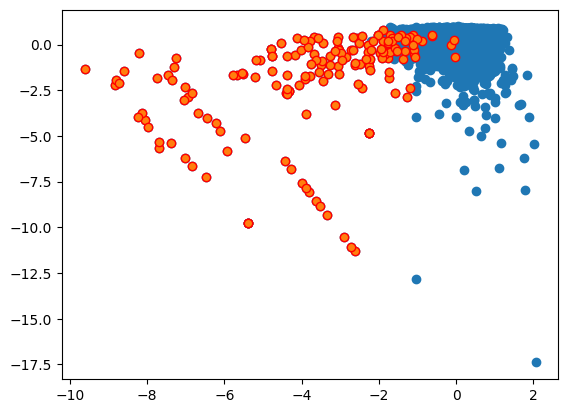

In [52]:
plt.scatter(X_test[:,12],X_test[:,1])
plt.scatter(X_test[outlier_bagging,12],X_test[outlier_bagging,1], edgecolors='r')

#Extratree Classifier

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100)
s_time_etc=time.time()
etc.fit(X_train,y_train)
e_time_etc=time.time()

In [54]:
y_pred_etc_test=etc.predict(X_test)
y_pred_etc_test

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
outlier_etc =np.where(etc.predict(X_test)==1)
outlier_etc

(array([  27,   31,   44,   56,   59,   62,   67,   77,   97,  116,  119,
         121,  136,  191,  197,  200,  203,  230,  237,  254,  277,  278,
         291,  314,  321,  369,  392,  408,  500,  523,  525,  564,  566,
         568,  578,  600,  622,  673,  677,  683,  805,  824,  843,  928,
         939,  947,  951, 1115, 1146, 1187, 1234, 1258, 1267, 1294, 1384,
        1386, 1399, 1414, 1441, 1461, 1467, 1499, 1525, 1591, 1638, 1695,
        1704, 1712, 1754, 1768, 1771, 1803, 1824, 1872, 1915, 1951, 1983,
        2050, 2053, 2065, 2104, 2108, 2139, 2156, 2175, 2177, 2241, 2270,
        2279, 2321, 2355, 2384, 2396, 2427, 2432, 2461, 2493, 2587, 2639,
        2673, 2677, 2688, 2765, 2772, 2841, 2919, 2952, 2973, 3004, 3014,
        3021, 3023, 3024, 3041, 3069, 3072, 3081, 3122, 3137, 3182, 3200,
        3230, 3252, 3277, 3289, 3306, 3322, 3347, 3365, 3369, 3370, 3373,
        3382, 3404, 3412, 3425, 3438, 3443, 3473, 3486, 3576, 3601, 3665,
        3699, 3779, 3794, 3801, 3810, 

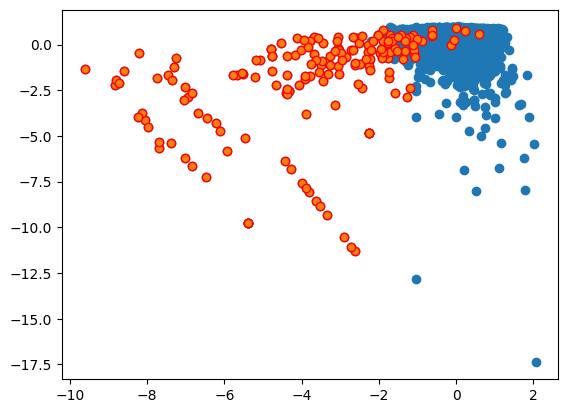

In [56]:
plt.scatter(X_test[:,12],X_test[:,1])
plt.scatter(X_test[outlier_etc,12],X_test[outlier_etc,1], edgecolors='r')

#Accuracy

In [57]:
from sklearn.metrics import confusion_matrix, f1_score, average_precision_score, classification_report, ConfusionMatrixDisplay, accuracy_score

##Confusion Matrix

##Confusion matrix of IsolationForest

In [58]:
confusion_matrix(y_test,y_pred_if_test)

array([[3823,  174],
       [  42,  158]])

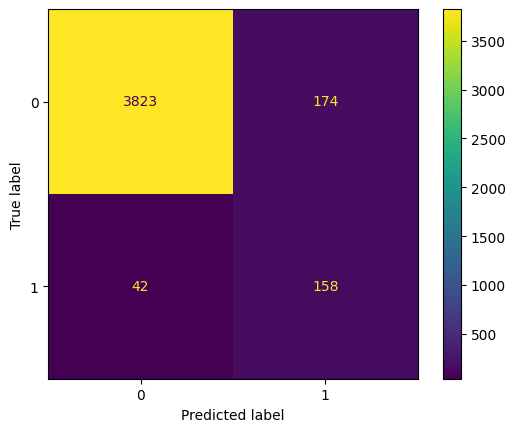

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_if_test)

In [60]:
print(classification_report(y_test,y_pred_if_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3997
           1       0.48      0.79      0.59       200

    accuracy                           0.95      4197
   macro avg       0.73      0.87      0.78      4197
weighted avg       0.96      0.95      0.95      4197



In [61]:
accuracy_score(y_test,y_pred_if_test)

0.9485346676197284

In [62]:
f1_score(y_test,y_pred_if_test)

0.5939849624060151

In [63]:
average_precision_score(y_test,y_pred_if_test)

0.38597100338451734

##Confusion matrix of RandomForest

In [64]:
confusion_matrix(y_test,y_pred_rfc_test)

array([[3995,    2],
       [  33,  167]])

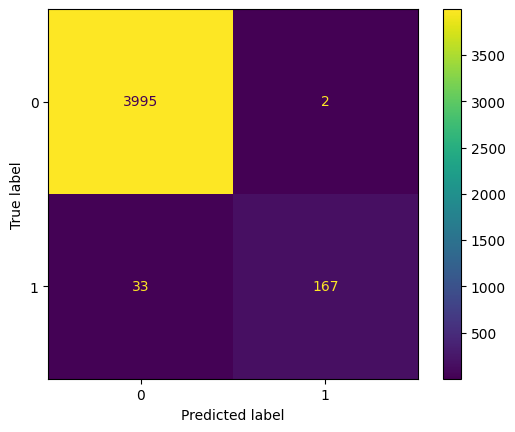

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc_test)

In [66]:
accuracy_score(y_test,y_pred_rfc_test)

0.9916607100309746

In [67]:
f1_score(y_test,y_pred_rfc_test)

0.9051490514905149

In [68]:
average_precision_score(y_test,y_pred_rfc_test)

0.8329811023089189

##Confusion matrix of DBSCAN

In [69]:
confusion_matrix(y_test,y_pred_db)

array([[   0,    0,    0,    0,    0],
       [ 107, 3890,    0,    0,    0],
       [  64,  107,   10,   12,    7],
       [   0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0]])

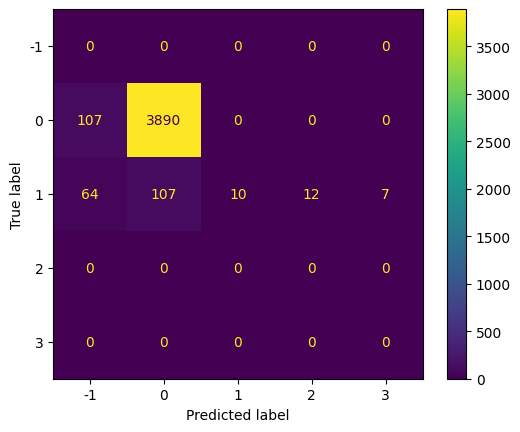

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_db)

In [71]:
accuracy_score(y_test,y_pred_db)

0.9292351679771265

In [72]:
f1_score(y_test,y_pred_db, average='micro')

0.9292351679771265

In [73]:
average_precision_score(y_test,y_pred_db)

0.17832151593626416

##Confusion matrix of Logistic Regression

In [74]:
confusion_matrix(y_test,y_pred)

array([[3994,    3],
       [  34,  166]])

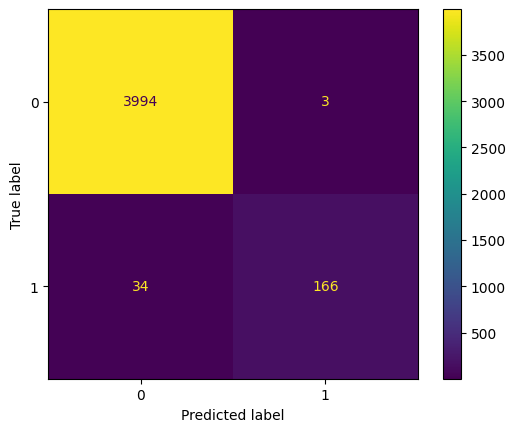

In [75]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [76]:
accuracy_score(y_test,y_pred)

0.9911841791756016

In [77]:
f1_score(y_test,y_pred)

0.8997289972899729

In [78]:
average_precision_score(y_test,y_pred)

0.8233672967306882

##Confusion matrix of LocalOutlierFactor

In [79]:
confusion_matrix(y_test,y_pred_lof)

array([[3647,  350],
       [ 172,   28]])

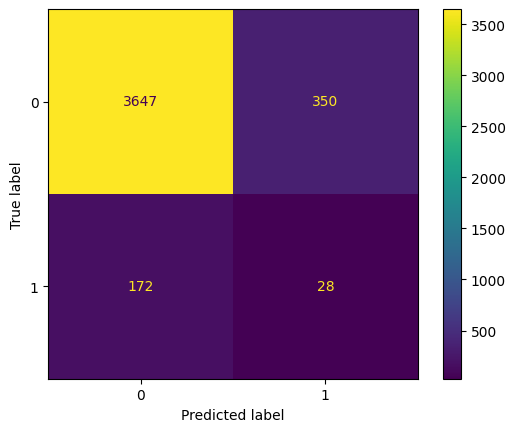

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lof)

In [81]:
accuracy_score(y_test,y_pred_lof)

0.875625446747677

In [82]:
f1_score(y_test,y_pred_lof)

0.09688581314878893

In [83]:
average_precision_score(y_test,y_pred_lof)

0.05135202393243851

##Confusion matrix of Decision Trees

In [84]:
confusion_matrix(y_test,y_pred_dt)

array([[3967,   30],
       [  37,  163]])

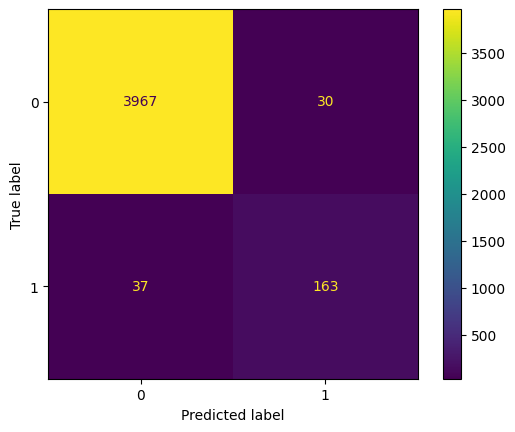

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)

In [86]:
accuracy_score(y_test,y_pred_dt)

0.9840362163450084

In [87]:
f1_score(y_test,y_pred_dt)

0.8295165394402035

In [88]:
average_precision_score(y_test,y_pred_dt)

0.6971318830005642

##Confusion matrix of One-Class SVM

In [89]:
confusion_matrix(y_test,y_pred_oc_svm)

array([[3801,  196],
       [  28,  172]])

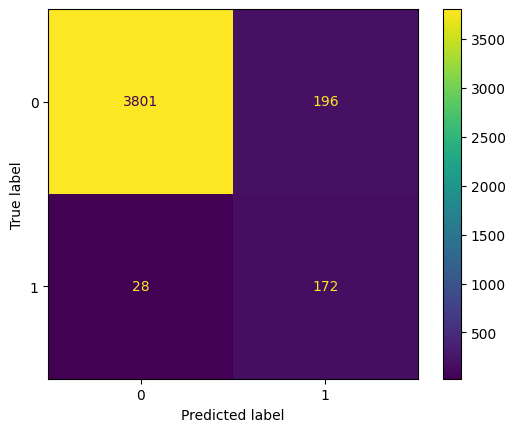

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_oc_svm)

In [91]:
accuracy_score(y_test,y_pred_oc_svm)

0.9466285441982368

In [92]:
f1_score(y_test,y_pred_oc_svm)

0.6056338028169014

In [93]:
average_precision_score(y_test,y_pred_oc_svm)

0.40862795371435084

##Confusion matrix of Bagging

In [94]:
confusion_matrix(y_test,y_pred_bgc_test)

array([[3995,    2],
       [  33,  167]])

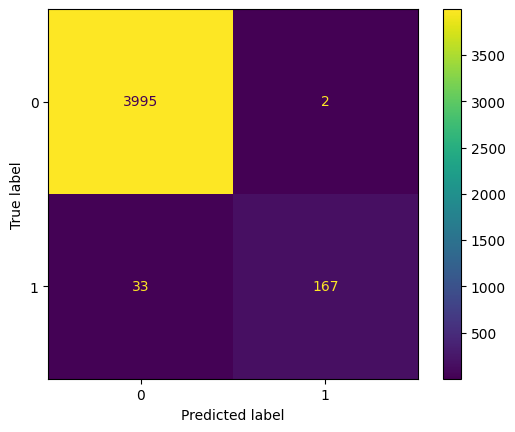

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_bgc_test)

In [96]:
accuracy_score(y_test,y_pred_bgc_test)

0.9916607100309746

In [97]:
f1_score(y_test,y_pred_bgc_test)

0.9051490514905149

In [98]:
average_precision_score(y_test,y_pred_bgc_test)

0.8329811023089189

##Confusion matrix of ExtraTrees

In [99]:
confusion_matrix(y_test,y_pred_etc_test)

array([[3992,    5],
       [  33,  167]])

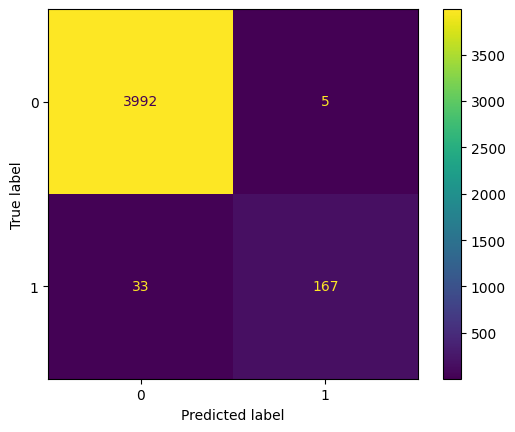

In [100]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_etc_test)

In [101]:
accuracy_score(y_test,y_pred_etc_test)

0.9909459137479152

In [102]:
f1_score(y_test,y_pred_etc_test)

0.8978494623655914

In [103]:
average_precision_score(y_test,y_pred_etc_test)

0.818589503299699

#Stacking RandomForest, LogisticRegression, BaggingClassifier, ExtraTreeClassifier, DecisionTree

In [104]:
from sklearn.ensemble import StackingClassifier
stc=StackingClassifier(estimators=[('rfc',rfc),('lr',lr),('bgc',bgc),('etc',etc),('dt',dt_model)])
s_time_stc=time.time()
stc.fit(X_train,y_train)
e_time_stc=time.time()

In [105]:
stc.score(X_test,y_test)

0.9914224446032881

In [106]:
y_pred_stc=stc.predict(X_test)
y_pred_stc

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
outlier_stc =np.where(stc.predict(X_test)==1)
outlier_stc

(array([  27,   31,   44,   56,   62,   67,   77,   97,  116,  119,  121,
         136,  191,  197,  200,  203,  230,  237,  254,  277,  278,  291,
         314,  321,  369,  392,  408,  500,  523,  525,  564,  566,  568,
         578,  600,  622,  673,  677,  683,  805,  824,  843,  928,  939,
         947,  951, 1115, 1146, 1187, 1234, 1258, 1267, 1294, 1384, 1386,
        1399, 1414, 1441, 1461, 1467, 1499, 1525, 1591, 1638, 1695, 1704,
        1712, 1754, 1768, 1771, 1803, 1824, 1872, 1915, 1951, 1983, 2050,
        2053, 2065, 2108, 2139, 2156, 2175, 2177, 2241, 2270, 2279, 2321,
        2355, 2384, 2396, 2427, 2432, 2461, 2493, 2587, 2639, 2673, 2677,
        2688, 2765, 2772, 2841, 2919, 2952, 2973, 3004, 3014, 3021, 3023,
        3024, 3041, 3069, 3072, 3081, 3122, 3137, 3182, 3200, 3230, 3252,
        3277, 3289, 3306, 3322, 3347, 3365, 3369, 3370, 3373, 3382, 3404,
        3412, 3425, 3438, 3443, 3473, 3486, 3576, 3601, 3699, 3779, 3794,
        3801, 3810, 3851, 3858, 3880, 

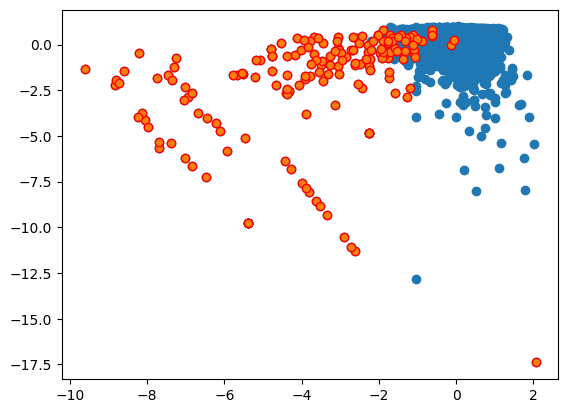

In [108]:
plt.scatter(X_test[:,12],X_test[:,1])
plt.scatter(X_test[outlier_stc,12],X_test[outlier_stc,1], edgecolors='r')

In [109]:
confusion_matrix(y_test,y_pred_stc)

array([[3994,    3],
       [  33,  167]])

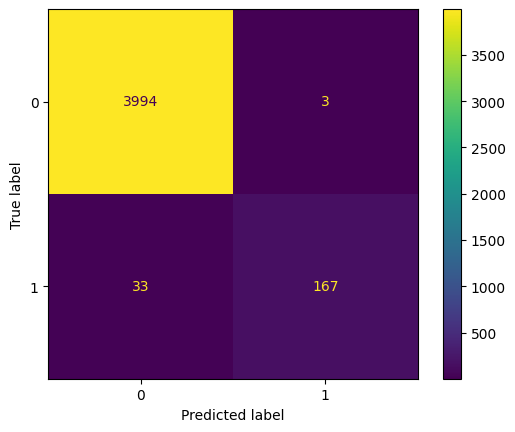

In [110]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_stc)

In [111]:
average_precision_score(y_test,y_pred_stc)

0.8281274649960055

In [112]:
f1_score(y_test,y_pred_stc)

0.9027027027027027

In [113]:
average_precision_score(y_test,y_pred_stc)

0.8281274649960055

#Stacking IsolationForest, LocalOutlierFactor, One-Class SVM

In [114]:
if_train_scores=clf.predict(X_train)
lof_train_scores=lof.fit_predict(X_train)
oc_svm_train_scores=oc_svm.predict(X_train)
lr_train_scores=lr.predict(X_train)
rfc_train_scores=rfc.predict(X_train)
dt_train_scores=dt_model.predict(X_train)
if_test_scores=clf.predict(X_test)
lof_test_scores=lof.fit_predict(X_test)
oc_svm_test_scores=oc_svm.predict(X_test)
lr_test_scores=lr.predict(X_test)
rfc_test_scores=rfc.predict(X_test)
dt_test_scores=dt_model.predict(X_test)

In [115]:
X_meta_train = np.column_stack((lof_train_scores, if_train_scores, oc_svm_train_scores))
X_meta_test = np.column_stack((lof_test_scores, if_test_scores, oc_svm_test_scores))

In [116]:
lr.fit(X_meta_train, y_train)
y_pred_meta = lr.predict(X_meta_test)

In [117]:
y_pred_meta

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
outlier_meta = np.where(y_pred_meta == 1)
outlier_meta

(array([  15,   27,   44,   47,   56,   62,   67,   69,   77,   97,  116,
         121,  136,  137,  148,  155,  191,  197,  200,  203,  230,  236,
         237,  254,  255,  277,  278,  300,  314,  317,  321,  334,  369,
         384,  408,  409,  436,  466,  500,  507,  523,  525,  564,  566,
         568,  578,  600,  622,  624,  632,  673,  677,  683,  751,  805,
         824,  838,  841,  843,  874,  898,  914,  928,  947,  951, 1115,
        1201, 1204, 1208, 1254, 1260, 1265, 1267, 1268, 1270, 1292, 1294,
        1339, 1362, 1371, 1377, 1384, 1399, 1428, 1441, 1461, 1467, 1491,
        1525, 1544, 1591, 1638, 1695, 1704, 1754, 1768, 1771, 1802, 1803,
        1824, 1828, 1829, 1872, 1908, 1915, 1955, 1960, 1983, 2016, 2065,
        2108, 2117, 2139, 2148, 2175, 2177, 2211, 2241, 2247, 2270, 2279,
        2311, 2355, 2396, 2414, 2425, 2427, 2432, 2438, 2454, 2461, 2493,
        2587, 2639, 2673, 2677, 2688, 2765, 2767, 2772, 2773, 2790, 2838,
        2841, 2890, 2892, 2952, 2968, 

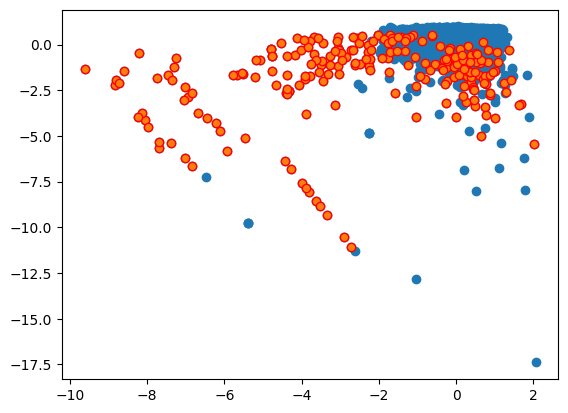

In [119]:
plt.scatter(X_test[:,12],X_test[:,1])
plt.scatter(X_test[outlier_meta,12],X_test[outlier_meta,1], edgecolors='r')

In [120]:
confusion_matrix(y_test,y_pred_meta)

array([[3909,   88],
       [  63,  137]])

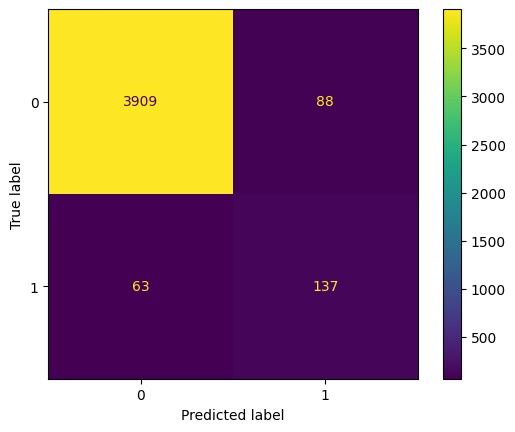

In [121]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_meta)

In [122]:
accuracy_score(y_test,y_pred_meta)

0.9640219204193472

In [123]:
f1_score(y_test,y_pred_meta)

0.6447058823529411

In [124]:
average_precision_score(y_test,y_pred_meta)

0.43209961083313486

##Stacking both Supervised and Unsupervised Methods

In [125]:
X_meta_train1 = np.column_stack((lof_train_scores, if_train_scores, oc_svm_train_scores, lr_train_scores))
X_meta_test1 = np.column_stack((lof_test_scores, if_test_scores, oc_svm_test_scores,lr_test_scores))

In [126]:
lr1 = LogisticRegression()
lr1.fit(X_meta_train1, y_train)
y_pred_meta1 = lr1.predict(X_meta_test1)

In [127]:
y_pred_meta1

array([0, 0, 0, ..., 0, 0, 0])

In [128]:
outlier_meta1 = np.where(y_pred_meta1 == 1)
outlier_meta1

(array([  27,   31,   44,   56,   62,   67,   77,   97,  116,  119,  121,
         136,  191,  197,  200,  203,  230,  237,  254,  277,  278,  291,
         314,  321,  369,  392,  408,  492,  500,  523,  525,  564,  566,
         568,  578,  600,  622,  673,  677,  683,  805,  824,  843,  928,
         939,  947,  951, 1115, 1146, 1187, 1234, 1258, 1267, 1294, 1384,
        1386, 1399, 1441, 1461, 1467, 1499, 1525, 1591, 1638, 1695, 1704,
        1712, 1754, 1768, 1771, 1803, 1824, 1872, 1915, 1951, 1983, 2050,
        2053, 2065, 2108, 2139, 2156, 2175, 2177, 2241, 2270, 2279, 2321,
        2355, 2384, 2396, 2427, 2432, 2461, 2493, 2587, 2639, 2673, 2677,
        2688, 2765, 2772, 2841, 2919, 2952, 2973, 3004, 3014, 3023, 3024,
        3041, 3069, 3072, 3081, 3122, 3137, 3182, 3200, 3230, 3252, 3277,
        3289, 3306, 3322, 3347, 3365, 3369, 3370, 3373, 3382, 3404, 3412,
        3425, 3438, 3443, 3473, 3486, 3576, 3601, 3699, 3779, 3794, 3801,
        3810, 3851, 3852, 3858, 3880, 

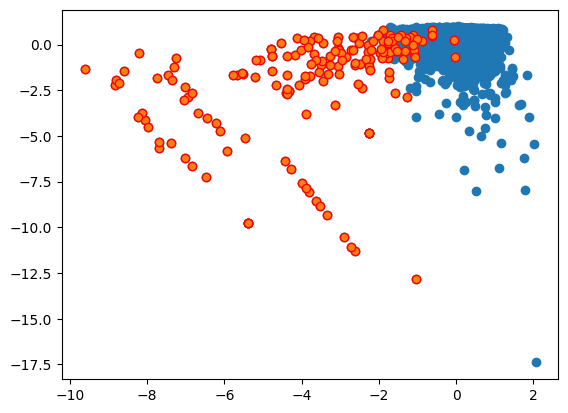

In [129]:
plt.scatter(X_test[:,12],X_test[:,1])
plt.scatter(X_test[outlier_meta1,12],X_test[outlier_meta1,1], edgecolors='r')

In [130]:
confusion_matrix(y_test,y_pred_meta1)

array([[3994,    3],
       [  34,  166]])

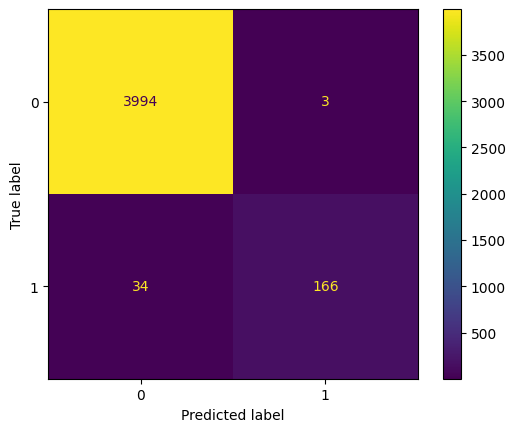

In [131]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_meta1)

In [132]:
f1_score(y_test,y_pred_meta1)

0.8997289972899729

In [133]:
average_precision_score(y_test,y_pred_meta1)

0.8233672967306882

#Reducing High Dimensionality and applying Unsupervised methods again

##LocalOutlierFactor

In [134]:
from sklearn.neighbors import LocalOutlierFactor
lof1 = LocalOutlierFactor(n_neighbors=5)
lof1.fit(X_train_reduced)

LocalOutlierFactor(n_neighbors=5)

In [135]:
y_pred_lof_red = lof1.fit_predict(X_test_reduced)
y_pred_lof_red

array([1, 1, 1, ..., 1, 1, 1])

In [136]:
outlier_lof_red=np.where(y_pred_lof_red==-1)
outlier_lof_red

(array([  16,   37,   65,   80,   93,  109,  111,  171,  185,  214,  223,
         234,  239,  274,  303,  305,  307,  333,  376,  413,  465,  524,
         542,  551,  552,  582,  665,  686,  695,  696,  700,  705,  714,
         757,  835,  857,  862,  884,  903,  943,  945,  967, 1008, 1010,
        1068, 1072, 1120, 1131, 1132, 1150, 1172, 1205, 1223, 1224, 1231,
        1239, 1270, 1288, 1291, 1330, 1339, 1377, 1416, 1431, 1448, 1485,
        1487, 1500, 1519, 1529, 1559, 1575, 1582, 1668, 1701, 1712, 1717,
        1760, 1789, 1798, 1804, 1812, 1854, 1859, 1866, 1879, 1914, 1920,
        1938, 1944, 1948, 1958, 1969, 1970, 1978, 1982, 2018, 2027, 2054,
        2066, 2071, 2084, 2107, 2130, 2165, 2171, 2181, 2219, 2225, 2227,
        2256, 2260, 2275, 2278, 2289, 2333, 2341, 2348, 2400, 2422, 2439,
        2462, 2473, 2511, 2537, 2552, 2557, 2559, 2585, 2622, 2676, 2680,
        2704, 2779, 2782, 2828, 2831, 2844, 2848, 2872, 2873, 2874, 2905,
        2918, 2919, 2951, 3014, 3065, 

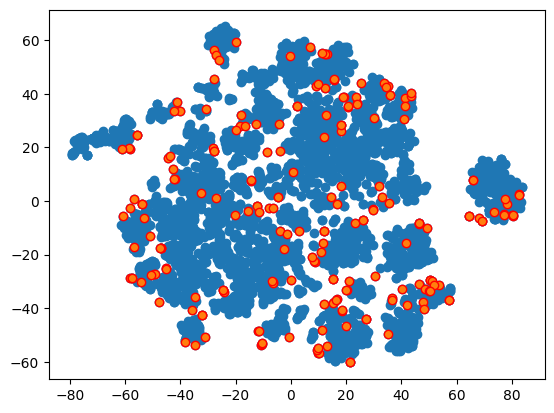

In [137]:
plt.scatter(X_test_reduced[:,0],X_test_reduced[:,1])
plt.scatter(X_test_reduced[outlier_lof_red,0],X_test_reduced[outlier_lof_red,1], edgecolors='r')

In [138]:
confusion_matrix(y_test,y_pred_lof_red)

array([[   0,    0,    0],
       [ 197,    0, 3800],
       [  12,    0,  188]])

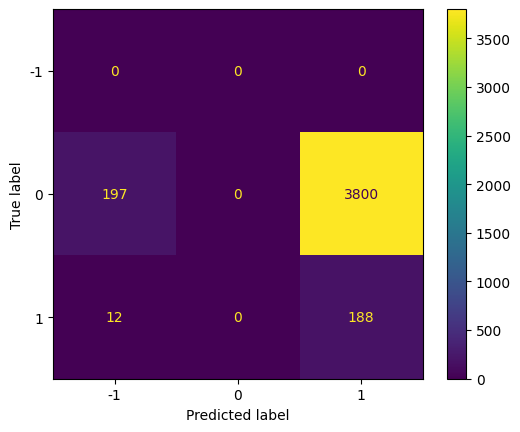

In [139]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lof_red)

##One-Class SVM

In [140]:
x_train_svm_red=X_train_reduced[y_train == 0]
oc_svm1 = OneClassSVM(kernel='rbf', nu=0.001)
oc_svm1.fit(x_train_svm_red)

y_pred_oc_svm1 = oc_svm1.predict(X_test_reduced)

In [141]:
y_pred_oc_svm1

array([1, 1, 1, ..., 1, 1, 1])

In [142]:
outlier_oc_svm1=np.where(y_pred_oc_svm1==-1)
outlier_oc_svm1

(array([   5,   26,   31,   60,   62,   68,   86,  121,  136,  143,  151,
         191,  196,  197,  200,  203,  205,  212,  218,  237,  242,  278,
         297,  321,  331,  336,  356,  363,  364,  393,  395,  399,  442,
         512,  546,  556,  578,  598,  600,  630,  647,  666,  677,  684,
         694,  696,  702,  727,  730,  745,  757,  758,  766,  786,  805,
         826,  840,  843,  853,  869,  879,  887,  897,  936,  947,  982,
         983,  988, 1020, 1031, 1032, 1091, 1095, 1096, 1100, 1102, 1109,
        1112, 1115, 1209, 1229, 1266, 1267, 1278, 1279, 1283, 1299, 1311,
        1330, 1339, 1347, 1349, 1351, 1357, 1399, 1425, 1428, 1441, 1473,
        1498, 1525, 1533, 1540, 1547, 1553, 1554, 1556, 1575, 1581, 1591,
        1597, 1638, 1665, 1666, 1693, 1703, 1745, 1747, 1760, 1763, 1768,
        1781, 1784, 1801, 1803, 1820, 1824, 1846, 1861, 1872, 1881, 1899,
        1913, 1976, 1980, 2004, 2014, 2054, 2061, 2084, 2139, 2158, 2168,
        2207, 2233, 2243, 2270, 2279, 

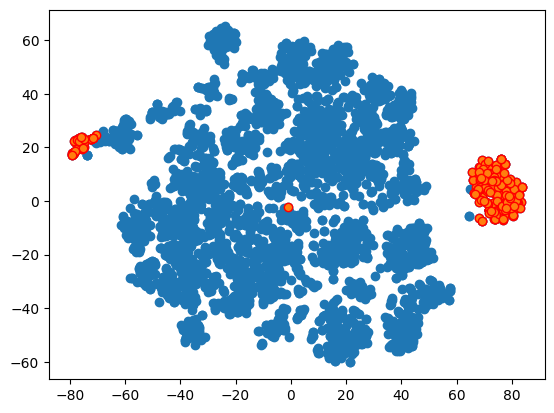

In [143]:
plt.scatter(X_test_reduced[:,0],X_test_reduced[:,1])
plt.scatter(X_test_reduced[outlier_oc_svm1,0],X_test_reduced[outlier_oc_svm1,1], edgecolors='r')

In [144]:
confusion_matrix(y_test,y_pred_oc_svm1)

array([[   0,    0,    0],
       [ 223,    0, 3774],
       [  47,    0,  153]])

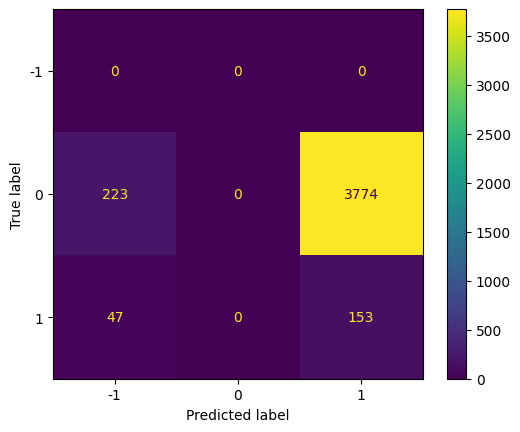

In [145]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_oc_svm1)

##DBSCAN

In [146]:
from sklearn.cluster import DBSCAN
dbscan1 = DBSCAN(eps=5)
dbscan1.fit(X_train_reduced)

DBSCAN(eps=5)

In [147]:
dbscan1.fit_predict(X_test_reduced)

array([0, 0, 0, ..., 0, 1, 0])

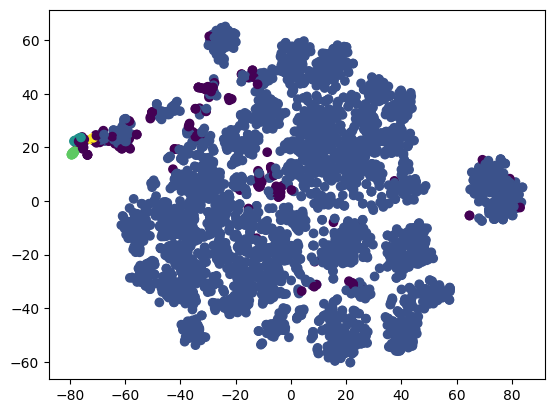

In [148]:
plt.scatter(X_test_reduced[:,0],X_test_reduced[:,1], c=dbscan.labels_)

In [149]:
confusion_matrix(y_test,y_pred_db)

array([[   0,    0,    0,    0,    0],
       [ 107, 3890,    0,    0,    0],
       [  64,  107,   10,   12,    7],
       [   0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0]])

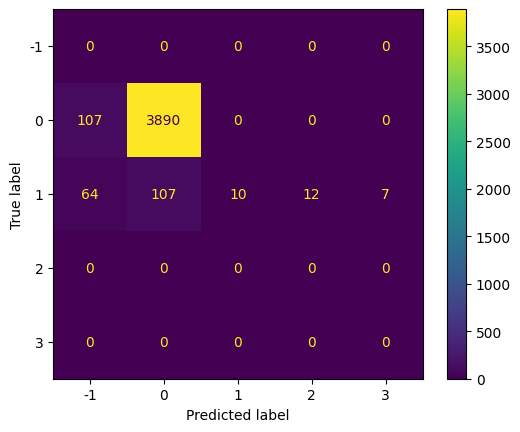

In [150]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_db)

##Isolation Forest

In [151]:
clf1=IsolationForest(contamination=0.1,n_estimators=100, random_state=42, verbose=0)
clf1.fit(X_train_reduced)

IsolationForest(contamination=0.1, random_state=42)

In [152]:
y_pred_if_red=clf1.predict(X_test_reduced)
y_pred_if_red

array([1, 1, 1, ..., 1, 1, 1])

In [153]:
outlier_if_red=np.where(y_pred_if_red==-1)
outlier_if_red

(array([   5,   26,   27,   31,   60,   62,   67,   68,   77,   86,  121,
         136,  143,  151,  191,  196,  197,  200,  203,  205,  212,  218,
         237,  242,  277,  278,  288,  297,  321,  331,  336,  356,  363,
         364,  393,  395,  399,  408,  442,  500,  512,  546,  556,  564,
         568,  578,  598,  600,  630,  647,  666,  673,  677,  683,  684,
         694,  696,  702,  727,  730,  745,  757,  758,  766,  786,  801,
         805,  824,  826,  840,  843,  853,  869,  879,  887,  897,  936,
         947,  951,  982,  983,  988, 1020, 1031, 1032, 1091, 1095, 1096,
        1100, 1102, 1109, 1112, 1115, 1146, 1159, 1209, 1229, 1234, 1266,
        1267, 1278, 1279, 1283, 1294, 1299, 1311, 1330, 1339, 1347, 1349,
        1351, 1357, 1386, 1399, 1425, 1428, 1441, 1473, 1498, 1525, 1533,
        1540, 1547, 1553, 1554, 1556, 1564, 1575, 1581, 1586, 1591, 1597,
        1638, 1665, 1666, 1693, 1703, 1704, 1745, 1747, 1757, 1760, 1763,
        1768, 1781, 1782, 1784, 1801, 

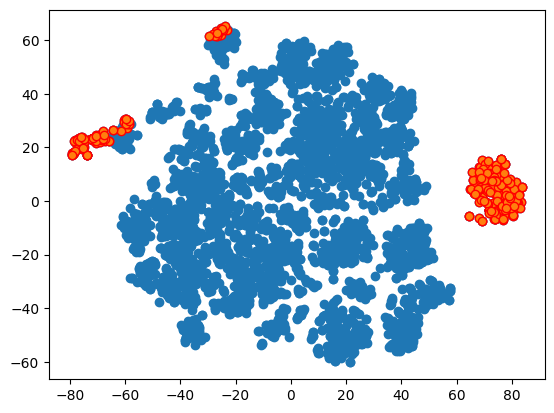

In [154]:
plt.scatter(X_test_reduced[:,0],X_test_reduced[:,1])
plt.scatter(X_test_reduced[outlier_if_red,0],X_test_reduced[outlier_if_red,1], edgecolors='r')

In [155]:
confusion_matrix(y_test,y_pred_if_red)

array([[   0,    0,    0],
       [ 242,    0, 3755],
       [  93,    0,  107]])

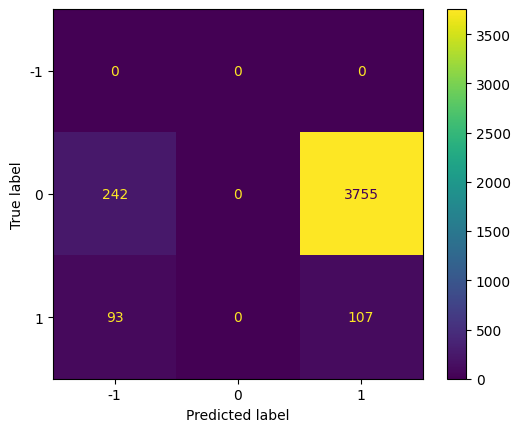

In [156]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_if_red)

#Defining time and scores

In [157]:
time_results=[e_time_if - s_time_if, e_time_lof - s_time_lof, e_time_db - s_time_db, e_time_oc_svm - s_time_oc_svm, e_time_rfc - s_time_rfc, e_time_lr - s_time_lr, e_time_dt - s_time_dt, e_time_bgc - s_time_bgc, e_time_etc - s_time_etc, e_time_stc - s_time_stc]
models=['IsolationForest', 'LocalOutlierFactor', 'DBSCAN', 'One-Class SVM', 'RandomForest', 'Logistic Regression', 'Decision Trees', 'Bagging Classifier', 'ExtraTree Classifier', 'Stacking']
f1_scores=[f1_score(y_test,y_pred_if_test),f1_score(y_test,y_pred_lof),f1_score(y_test,y_pred_db, average='micro'),f1_score(y_test,y_pred_oc_svm),f1_score(y_test,y_pred_rfc_test),f1_score(y_test,y_pred),f1_score(y_test,y_pred_dt),f1_score(y_test,y_pred_bgc_test),f1_score(y_test,y_pred_etc_test),f1_score(y_test,y_pred_stc)]
average_precision_scores=[average_precision_score(y_test,y_pred_if_test),average_precision_score(y_test,y_pred_lof),average_precision_score(y_test,y_pred_db, average='micro'),average_precision_score(y_test,y_pred_oc_svm),average_precision_score(y_test,y_pred_rfc_test),average_precision_score(y_test,y_pred),average_precision_score(y_test,y_pred_dt),average_precision_score(y_test,y_pred_bgc_test),average_precision_score(y_test,y_pred_etc_test),average_precision_score(y_test,y_pred_stc)]
Z=range(len(models))

#Time complexity

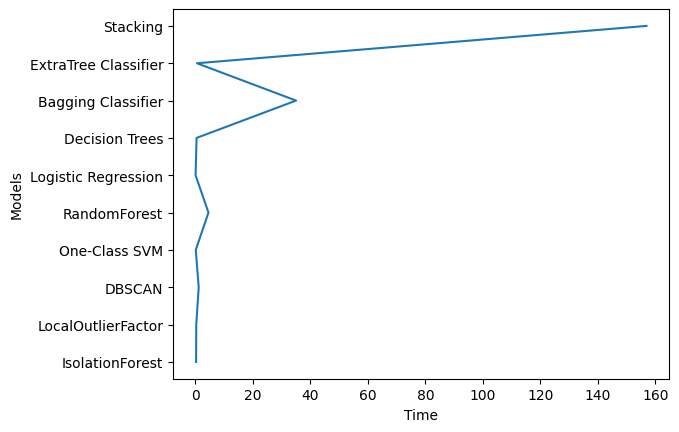

In [158]:
plt.plot(time_results, models)
plt.xlabel('Time')
plt.ylabel('Models')
plt.show()

#Ploting performance scores of Models

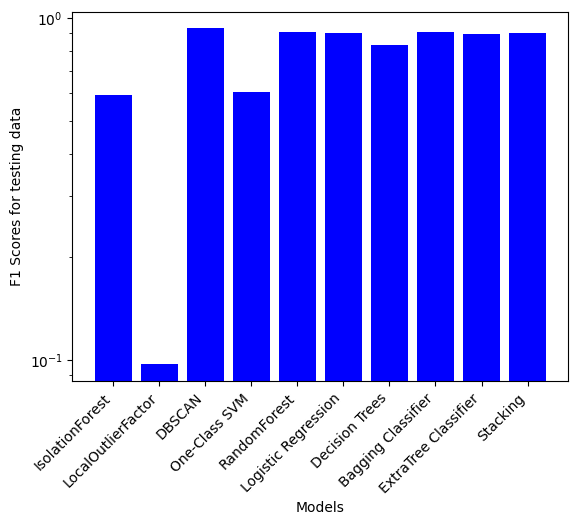

In [159]:
fig, ax= plt.subplots()
ax.bar(Z, f1_scores, color='blue')
ax.set_yscale('log')
plt.xticks(Z, models, rotation=45, ha= 'right')
plt.xlabel('Models')
plt.ylabel('F1 Scores for testing data')
plt.tight_layout
plt.show()

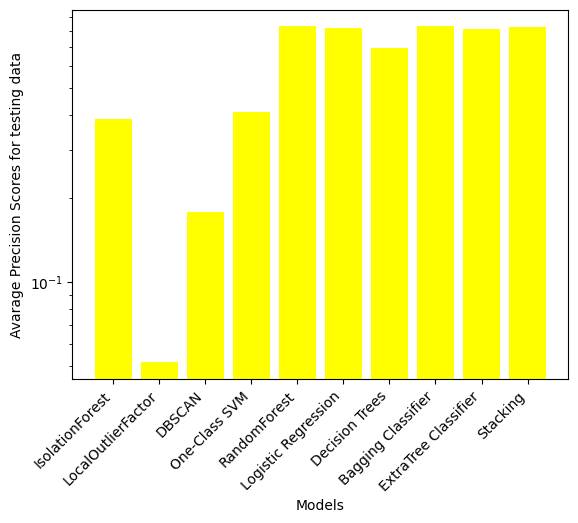

In [160]:
fig, ax= plt.subplots()
ax.bar(Z, average_precision_scores, color='yellow')
ax.set_yscale('log')
plt.xticks(Z, models, rotation=45, ha= 'right')
plt.xlabel('Models')
plt.ylabel('Avarage Precision Scores for testing data')
plt.tight_layout
plt.show()